Name: Shrinath Mishra

# **Problem Statement:**
**Building a new Employee Security System**
You, as the Security analyst, at Stark Industries, have been tasked to build a new contactless employee check-in system. Currently the employees use a physical keycard for entry into the building like shown below. 

You have come up with a new idea that uses the employees smartphone and machine learning to provide a contactless system where when an employee enters the firm’s territory, his or her smartphone connects to the server and transmits data from the employee smartphone sensor data like the accelerometer's data. The server performs the calculations and determines this person as
one of the employees using Gait analysis. Essentially it compares the current pattern of the employee’s gait with the historial pattern and if there is a match, the doors automatically open for the employee to walk in.

To test your idea, you have built a dataset of 30 employees and their daily activities here. Design and develop a system that will perform the gait analysis. 

In the given problem statement, we will analyse the 30 employees first on the basis of their daily activities with some pattern. We can name these patterns as the activity labels. There are 6 main patterns in the activity labels as follows:
1. WALKING
2. WALKING_UPSTAIRS
3. WALKING_DOWNSTAIRS
4. SITTING
5. STANDING
6. LAYING

The smartphone with sensors like Accelerometer and Gyroscope will store data of these 6 activity labels. We will then build a machine learning model that will analyse and identify the patterns of an individual and can predict if the person is among the 30 employees that we have registered. 

We will consider different machine learning models that will assist us with their respective accuracies and prediction score, through which we can choose which model has the best accuracy and the prediction score and then proceed ahead to deploy that model into a proper security system.



# **GAIT Analysis**

Gait Analysis is an assessment of the way the body moves from one place to another. In our problem statement through GAIT Analysis, a reliable and precise form of data is stored of an individual while performing their usual activities.

<p align="left">
  <img width="600" height="325" src="https://blogs.mathworks.com/cleve/files/walker.gif">
</p>

In [ ]:
from google.colab import drive

drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/MyDrive/Employee_Security_System

/content/gdrive/MyDrive/Employee_Security_System


In [ ]:
import os

if not os.path.isdir("Employee_Security_System"):
  os.makedirs("Employee_Security_System") 

In [ ]:
!unzip "/content/gdrive/MyDrive/Employee_Security_System/UCI HAR Dataset.zip"

Archive:  /content/gdrive/MyDrive/Employee_Security_System/UCI HAR Dataset.zip
replace UCI HAR Dataset/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: N
N


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import math

In [ ]:
train_df = pd.read_csv("UCI HAR Dataset/train/X_train.txt", delim_whitespace = True,names=list(range(0,561)))

train_df['Subject'] = pd.read_csv("UCI HAR Dataset/train/subject_train.txt", header = None, squeeze = True)

train_df["activity"] = pd.read_csv("UCI HAR Dataset/train/y_train.txt", header = None, squeeze = True)

In [ ]:
features = list()
with open("UCI HAR Dataset/features.txt") as f:
    for line in f:
        features.append(line.split()[1])

In [ ]:
features

['tBodyAcc-mean()-X',
 'tBodyAcc-mean()-Y',
 'tBodyAcc-mean()-Z',
 'tBodyAcc-std()-X',
 'tBodyAcc-std()-Y',
 'tBodyAcc-std()-Z',
 'tBodyAcc-mad()-X',
 'tBodyAcc-mad()-Y',
 'tBodyAcc-mad()-Z',
 'tBodyAcc-max()-X',
 'tBodyAcc-max()-Y',
 'tBodyAcc-max()-Z',
 'tBodyAcc-min()-X',
 'tBodyAcc-min()-Y',
 'tBodyAcc-min()-Z',
 'tBodyAcc-sma()',
 'tBodyAcc-energy()-X',
 'tBodyAcc-energy()-Y',
 'tBodyAcc-energy()-Z',
 'tBodyAcc-iqr()-X',
 'tBodyAcc-iqr()-Y',
 'tBodyAcc-iqr()-Z',
 'tBodyAcc-entropy()-X',
 'tBodyAcc-entropy()-Y',
 'tBodyAcc-entropy()-Z',
 'tBodyAcc-arCoeff()-X,1',
 'tBodyAcc-arCoeff()-X,2',
 'tBodyAcc-arCoeff()-X,3',
 'tBodyAcc-arCoeff()-X,4',
 'tBodyAcc-arCoeff()-Y,1',
 'tBodyAcc-arCoeff()-Y,2',
 'tBodyAcc-arCoeff()-Y,3',
 'tBodyAcc-arCoeff()-Y,4',
 'tBodyAcc-arCoeff()-Z,1',
 'tBodyAcc-arCoeff()-Z,2',
 'tBodyAcc-arCoeff()-Z,3',
 'tBodyAcc-arCoeff()-Z,4',
 'tBodyAcc-correlation()-X,Y',
 'tBodyAcc-correlation()-X,Z',
 'tBodyAcc-correlation()-Y,Z',
 'tGravityAcc-mean()-X',
 'tGravityA

In [ ]:
test_df = pd.read_csv("UCI HAR Dataset/test/X_test.txt", delim_whitespace = True,names=list(range(0,561)))

test_df['Subject'] = pd.read_csv("UCI HAR Dataset/test/subject_test.txt", header = None, squeeze = True)

test_df["activity"] = pd.read_csv("UCI HAR Dataset/test/y_test.txt", header = None, squeeze = True)

In [ ]:
train_df.to_csv('train.csv',index_label=False)

In [ ]:
test_df.to_csv('test.csv',index_label=False)

In [ ]:
train_df= pd.read_csv('/content/gdrive/MyDrive/Employee_Security_System/train.csv')

In [ ]:
train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,553,554,555,556,557,558,559,560,Subject,activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,5
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,5
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,5
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,5
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,5


In [ ]:
test_df = pd.read_csv('/content/gdrive/MyDrive/Employee_Security_System/test.csv')

In [ ]:
test_df.head()

,0,1,2,3,4,5,6,7,8,9,...,553,554,555,556,557,558,559,560,Subject,activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,5
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,5
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,5
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,5
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,5


# **LSTM**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, Flatten,Dropout

In [ ]:
training_data = []

In [ ]:
sensors_data=['body_acc_x_train','body_acc_y_train','body_acc_z_train','body_gyro_x_train','body_gyro_y_train',
                   'body_gyro_z_train','total_acc_x_train','total_acc_y_train','total_acc_z_train']
     

In [ ]:
for fn in sensors_data:
  training_data.append(np.array(pd.read_csv("/content/gdrive/MyDrive/Employee_Security_System/UCI HAR Dataset/train/Inertial Signals/"+fn+".txt",delim_whitespace=True,header=None)))

In [ ]:
np.array(training_data).shape

(9, 7352, 128)

In [ ]:
np.transpose(training_data,(1,2,0)).shape

(7352, 128, 9)

In [ ]:
training_data = np.transpose(training_data,(1,2,0))

In [ ]:
training_labels = pd.read_csv("/content/gdrive/MyDrive/Employee_Security_System/UCI HAR Dataset/train/y_train.txt", header = None)

In [ ]:
training_labels = training_labels - 1

In [ ]:
training_labels = np.array(training_labels)

In [ ]:
testing_data = []

In [ ]:
sensor_data = ['body_acc_x_test','body_acc_y_test','body_acc_z_test','body_gyro_x_test','body_gyro_y_test',
                   'body_gyro_z_test','total_acc_x_test','total_acc_y_test','total_acc_z_test']

In [ ]:
for fn in sensor_data:
  testing_data.append(np.array(pd.read_csv("/content/gdrive/MyDrive/Employee_Security_System/UCI HAR Dataset/test/Inertial Signals/" + fn + ".txt", delim_whitespace = True, header = None)))

In [ ]:
np.array(testing_data).shape

(9, 2947, 128)

In [ ]:
np.transpose(testing_data, (1,2,0)).shape

(2947, 128, 9)

In [ ]:
testing_data = np.transpose(testing_data,(1,2,0))

In [ ]:
testing_labels = pd.read_csv("/content/gdrive/MyDrive/Employee_Security_System/UCI HAR Dataset/test/y_test.txt", header = None)

In [ ]:
testing_labels = testing_labels - 1

In [ ]:
testing_labels = np.array(testing_labels)

In [ ]:
from keras.utils.np_utils import to_categorical


In [ ]:
train_labels_cat=to_categorical(training_labels)

In [ ]:
test_labels_cat=to_categorical(testing_labels)

In [ ]:
train_labels_cat.shape

(7352, 6)

In [ ]:
test_labels_cat.shape

(2947, 6)

In [ ]:
training_data.shape

(7352, 128, 9)

In [ ]:
model = Sequential()
model.add(LSTM(128,return_sequences = True, input_shape = (128,9)))
model.add(Dropout(0.2))
model.add(LSTM(64))
model.add(Dropout(0.2))
model.add(Dense(6, activation = 'softmax'))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 128, 128)          70656     
                                                                 
 dropout_6 (Dropout)         (None, 128, 128)          0         
                                                                 
 lstm_7 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_7 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 6)                 390       
                                                                 
Total params: 120,454
Trainable params: 120,454
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(training_data,train_labels_cat,epochs=100,validation_split= 0.05)

Epoch 1/100
219/219 [==============================] - 12s 18ms/step - loss: 0.8617 - accuracy: 0.6481 - val_loss: 0.5588 - val_accuracy: 0.7908
Epoch 2/100
219/219 [==============================] - 3s 15ms/step - loss: 0.4034 - accuracy: 0.8617 - val_loss: 0.2426 - val_accuracy: 0.8940
Epoch 3/100
219/219 [==============================] - 3s 15ms/step - loss: 0.2445 - accuracy: 0.9194 - val_loss: 0.2204 - val_accuracy: 0.8967
Epoch 4/100
219/219 [==============================] - 3s 15ms/step - loss: 0.1716 - accuracy: 0.9391 - val_loss: 0.1286 - val_accuracy: 0.9511
Epoch 5/100
219/219 [==============================] - 4s 18ms/step - loss: 0.1520 - accuracy: 0.9464 - val_loss: 0.1553 - val_accuracy: 0.9457
Epoch 6/100
219/219 [==============================] - 3s 15ms/step - loss: 0.1535 - accuracy: 0.9487 - val_loss: 0.1312 - val_accuracy: 0.9538
Epoch 7/100
219/219 [==============================] - 3s 15ms/step - loss: 0.1483 - accuracy: 0.9469 - val_loss: 0.1612 - val_accuracy

In [ ]:
prediction_label_cat = model.predict(testing_data)

93/93 [==============================] - 1s 7ms/step


In [ ]:
prediction_label = np.argmax(prediction_label_cat, axis = 1)

In [ ]:
prediction_label

array([4, 4, 4, ..., 1, 1, 1])

In [ ]:
import sklearn.metrics as skm

In [ ]:
skm.accuracy_score(testing_labels,prediction_label)

0.9148286392941974

In [ ]:
print(skm.classification_report(testing_labels,prediction_label))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95       496
           1       0.99      0.95      0.97       471
           2       0.91      1.00      0.95       420
           3       0.86      0.74      0.79       491
           4       0.79      0.89      0.83       532
           5       1.00      1.00      1.00       537

    accuracy                           0.91      2947
   macro avg       0.92      0.92      0.92      2947
weighted avg       0.92      0.91      0.91      2947



In [ ]:
print(skm.confusion_matrix(testing_labels,prediction_label))

[[461   4  31   0   0   0]
 [ 14 446   9   0   2   0]
 [  0   1 419   0   0   0]
 [  0   0   1 361 127   2]
 [  1   1   0  58 472   0]
 [  0   0   0   0   0 537]]


In [ ]:
model.save('LSTM.h5')

# **CNN-LSTM**

In [ ]:
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.utils import to_categorical


In [ ]:

# load a single file as a numpy array
def file_load(filepath):
	dataframe = read_csv(filepath, header=None, delim_whitespace=True)
	return dataframe.values

# load a list of files and return as a 3d numpy array
def load_group(filenames, prefix=''):
	loaded = list()
	for name in filenames:
		data = file_load(prefix + name)
		loaded.append(data)
	# stack group so that features are the 3rd dimension
	loaded = dstack(loaded)
	return loaded


In [ ]:
# load a dataset group, such as train or test
def dataset_group(group, prefix=''):
	filepath = prefix + group + '/Inertial Signals/'
	# load all 9 files as a single array
	filenames = list()
	# total acceleration
	filenames += ['total_acc_x_'+group+'.txt', 'total_acc_y_'+group+'.txt', 'total_acc_z_'+group+'.txt']
	# body acceleration
	filenames += ['body_acc_x_'+group+'.txt', 'body_acc_y_'+group+'.txt', 'body_acc_z_'+group+'.txt']
	# body gyroscope
	filenames += ['body_gyro_x_'+group+'.txt', 'body_gyro_y_'+group+'.txt', 'body_gyro_z_'+group+'.txt']
	# load input data
	X = load_group(filenames, filepath)
	# load class output
	y = file_load(prefix + group + '/y_'+group+'.txt')
	return X, y

# load the dataset, returns train and test X and y elements
def load_dataset(prefix=''):
	# load all train
	trainX, trainy = dataset_group('train', prefix + '/content/gdrive/MyDrive/Employee_Security_System/UCI HAR Dataset/')
	print(trainX.shape, trainy.shape)
	# load all test
	testX, testy = dataset_group('test', prefix + '/content/gdrive/MyDrive/Employee_Security_System/UCI HAR Dataset/')
	print(testX.shape, testy.shape)
	# zero-offset class values
	trainy = trainy - 1
	testy = testy - 1
	# one hot encode y
	trainy = to_categorical(trainy)
	testy = to_categorical(testy)
	print(trainX.shape, trainy.shape, testX.shape, testy.shape)
	return trainX, trainy, testX, testy


In [ ]:
# fit and evaluate a model
def evaluate_model(trainX, trainy, testX, testy):
	verbose, epochs, batch_size = 0, 10, 32
	n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainy.shape[1]
	model = Sequential()
	model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
	model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
	model.add(Dropout(0.5))
	model.add(MaxPooling1D(pool_size=2))
	model.add(Flatten())
	model.add(Dense(100, activation='relu'))
	model.add(Dense(n_outputs, activation='softmax'))
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
	# fit network
	history=model.fit(trainX, trainy, epochs=epochs, batch_size=batch_size, verbose=verbose)
	# evaluate model
	_, accuracy = model.evaluate(testX, testy, batch_size=batch_size, verbose=0)
	return accuracy, history

In [ ]:
# summarize scores
def summarize_results(scores):
	print(scores)
	m, s = mean(scores), std(scores)
	print('Accuracy: %.3f%% (+/-%.3f)' % (m, s))

# run an experiment
def run_experiment(repeats=10):
	# load data
	trainX, trainy, testX, testy = load_dataset()
	# repeat experiment
	scores = list()
	for r in range(repeats):
		score, history = evaluate_model(trainX, trainy, testX, testy)
		score = score * 100.0
		print('>#%d: %.3f' % (r+1, score))
		scores.append(score)
	# summarize results
	summarize_results(scores)
	history_dict = history.history
	print(history_dict.keys())
	return history
 

# run the experiment
history = run_experiment()

(7352, 128, 9) (7352, 1)
(2947, 128, 9) (2947, 1)
(7352, 128, 9) (7352, 6) (2947, 128, 9) (2947, 6)
>#1: 92.060
>#2: 90.465
>#3: 90.635
>#4: 90.397
>#5: 89.956
>#6: 90.227
>#7: 91.856
>#8: 89.243
>#9: 92.297
>#10: 90.906
[92.05971956253052, 90.46487808227539, 90.63454270362854, 90.39701223373413, 89.95589017868042, 90.22734761238098, 91.85612201690674, 89.24329876899719, 92.29725003242493, 90.90600609779358]
Accuracy: 90.804% (+/-0.934)
dict_keys(['loss', 'acc'])


In [ ]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['loss', 'acc'])


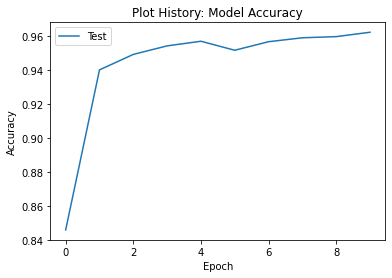

In [ ]:
# plot the accuracy and loss
import matplotlib.pyplot as plt
plt.plot(history.history['acc'], label='test')
# plt.plot(history.history['val_accuracy'], label='test')
plt.title('Plot History: Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Test'], loc='upper left')
plt.show()

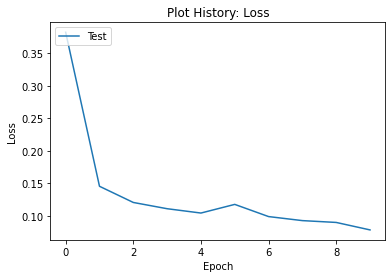

In [ ]:
#history of loss
plt.plot(history.history['loss'], label='test')
plt.title('Plot History: Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test'], loc='upper left')
plt.show()

| Models Trained | Accuracy Score |
|----------------|----------------|
|LSTM|91.48%                |
|CNN-LSTM|90.80%               |